In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import pandas as pd

def get_video_data(folder_path, label_list):
    video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

    data = []
    for video_file in video_files:
        for label in label_list:
            if label in video_file:
                video_path = os.path.join(folder_path, video_file)
                cap = cv2.VideoCapture(video_path)
                total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                fps = int(cap.get(cv2.CAP_PROP_FPS))
                duration = total_frames / fps
                data.append({
                    'File Name': video_file,
                    'Label': label,
                    'Frame Length': total_frames,
                    'Duration (seconds)': duration
                })
                cap.release()
                break

    return data

def write_to_excel(data, output_file):
    df = pd.DataFrame(data)
    df.to_excel(output_file, index=False)

folder_path = 'drive/MyDrive/Approach_100'
label_list = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
output_excel = 'drive/MyDrive/video_labels.xlsx'

video_data = get_video_data(folder_path, label_list)
write_to_excel(video_data, output_excel)

print(f"Video data extracted and saved to '{output_excel}'.")


Video data extracted and saved to 'drive/MyDrive/video_labels.xlsx'.


In [ ]:
def check_file_in_folder(folder_path, file_name):
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        print(f"The file '{file_name}' exists in the folder '{folder_path}'.")
    else:
        print(f"The file '{file_name}' does not exist in the folder '{folder_path}'.")

# Example usage:
folder_path = 'drive/MyDrive'  # Replace with the path to your folder
file_name = 'video_labels.xlsx'  # Replace with the name of the file you're searching for

check_file_in_folder(folder_path, file_name)

In [ ]:
#check the class distribution for the train, validation and test set

import pandas as pd
def count_files_per_label_from_excel(excel_file, folder_path):
    """
    Count the number of files in a folder for each class label based on an Excel file.

    Args:
        excel_file (str): Path to the Excel file containing 'file_names' and 'class' columns.
        folder_path (str): Path to the folder containing the documents.

    Returns:
        dict: A dictionary with class labels as keys and the corresponding file counts as values.
    """
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file)

    # Initialize a dictionary to store the class counts
    class_counts = {}

    # Iterate through unique class labels in the DataFrame
    for label in df['Label'].unique():
        # Filter the DataFrame for the current class label
        class_df = df[df['Label'] == label]

        # Get the file names for the current class
        file_names = class_df['File Name'].tolist()

        # Initialize a count for the current class
        count = 0

        # Iterate through the file names and count the files in the folder
        for file_name in file_names:
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                count += 1

        # Store the count for the current class label
        class_counts[label] = count

    return class_counts

#check the distribution for the train, validation and test set of 16 frames
class_counts_train = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/16frames/Train16')
print('The training set for 16 frames has a class distribution of:', class_counts_train)

class_counts_val = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/16frames/Val16')
print('The validation set for 16 frames has a class distribution of:', class_counts_val)

class_counts_test = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/16frames/Test16')
print('The test set for 16 frames has a class distribution of:', class_counts_test)

class_counts_approach_100 = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/Approach_100')
print('The approach_100 set has a class distribution of:', class_counts_approach_100)

#check the distribution of the sets for 32 frames
class_counts_train = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/32frames/Train32')
print('The training set for 32 farmeshas a class distribution of:', class_counts_train)

class_counts_val = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/32frames/Val32')
print('The validation set for 32 frames has a class distribution of:', class_counts_val)

class_counts_test = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/32frames/Test132')
print('The test set for 32 frames has a class distribution of:', class_counts_test)

class_counts_approach_100 = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/Approach_100')
print('The approach_100 set has a class distribution of:', class_counts_approach_100)
#check the distribution of the sets for 48 frames
class_counts_train = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/48frames/Train48')
print('The training set for 48 frames has a class distribution of:', class_counts_train)

class_counts_val = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/48frames/Val48')
print('The validation set for 48 frames has a class distribution of:', class_counts_val)

class_counts_test = count_files_per_label_from_excel('drive/MyDrive/video_labels.xlsx', 'drive/MyDrive/48frames/Test48')
print('The test set for 48 frames has a class distribution of:', class_counts_test)

#they should all have the same distribution as the dyads were equally divided


The training set for 16 frames has a class distribution of: {'a7': 135, 'a9': 17, 'a1': 133, 'a2': 136, 'a3': 135, 'a6': 135, 'a4': 136, 'a5': 135, 'a8': 131}
The validation set for 16 frames has a class distribution of: {'a7': 16, 'a9': 4, 'a1': 16, 'a2': 16, 'a3': 16, 'a6': 16, 'a4': 16, 'a5': 16, 'a8': 15}
The test set for 16 frames has a class distribution of: {'a7': 16, 'a9': 4, 'a1': 15, 'a2': 16, 'a3': 16, 'a6': 16, 'a4': 16, 'a5': 16, 'a8': 16}
The approach_100 set has a class distribution of: {'a7': 167, 'a9': 25, 'a1': 164, 'a2': 168, 'a3': 167, 'a6': 167, 'a4': 168, 'a5': 167, 'a8': 162}
The training set for 32 farmeshas a class distribution of: {'a7': 135, 'a9': 17, 'a1': 133, 'a2': 136, 'a3': 135, 'a6': 135, 'a4': 136, 'a5': 135, 'a8': 131}
The validation set for 32 frames has a class distribution of: {'a7': 16, 'a9': 4, 'a1': 16, 'a2': 16, 'a3': 16, 'a6': 16, 'a4': 16, 'a5': 16, 'a8': 15}
The test set for 32 frames has a class distribution of: {'a7': 0, 'a9': 0, 'a1': 0, 

In [ ]:
import os

def count_files_in_folder(folder_path):
    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

# Example usage:
folder_path = 'drive/MyDrive/Train16'  # Replace with the path to your folder
file_count = count_files_in_folder(folder_path)
print(f"The folder contains {file_count} files.")


The folder contains 1906 files.


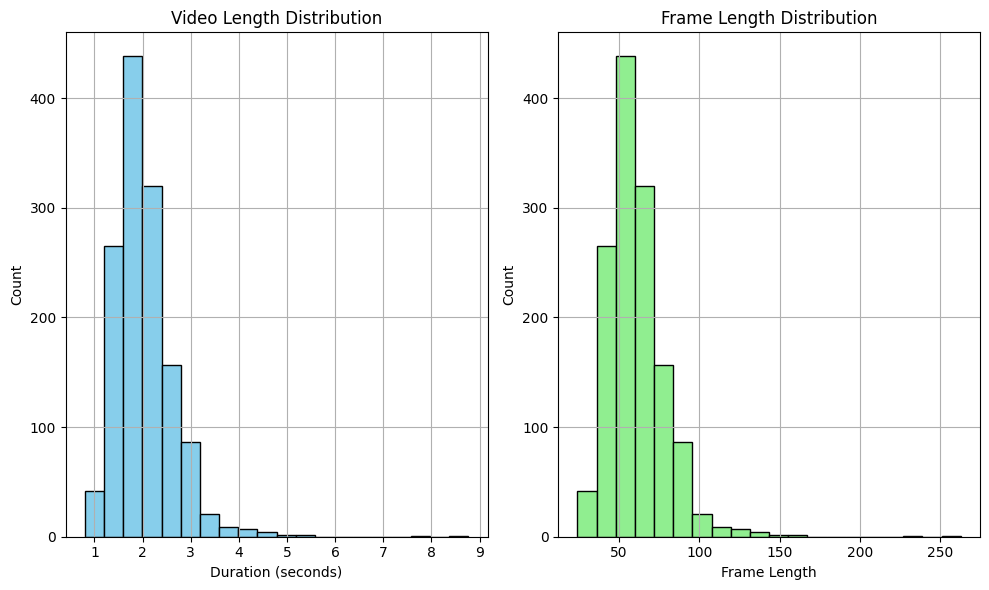

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_video_length_distribution(excel_file, frame_rate):
    """
    Plot the distribution of video lengths and frame lengths from an Excel file.

    Args:
        excel_file (str): Path to the Excel file containing video length information.
        frame_rate (int): Frame rate of the videos.

    Returns:
        None
    """
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file)

    # Extract the 'Duration (seconds)' column
    video_lengths = df['Duration (seconds)']

    # Calculate frame length in frames
    frame_length = video_lengths * frame_rate

    # Add 'Frame Length' column to the DataFrame
    df['Frame Length'] = frame_length

    # Create a histogram to visualize the distribution of video lengths and frame lengths
    plt.figure(figsize=(10, 6))

    # Plot video lengths in seconds
    plt.subplot(1, 2, 1)
    plt.hist(video_lengths, bins=20, color='skyblue', edgecolor='black')
    plt.title('Video Length Distribution')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.grid(True)

    # Plot frame lengths in frames
    plt.subplot(1, 2, 2)
    plt.hist(frame_length, bins=20, color='lightgreen', edgecolor='black')
    plt.title('Frame Length Distribution')
    plt.xlabel('Frame Length')
    plt.ylabel('Count')
    plt.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Specify the Excel file containing video length information
excel_file = 'drive/MyDrive/video_labels.xlsx'

# Assume a frame rate of 30 frames per second (change this value accordingly)
frame_rate = 30

# Call the function with the file and frame rate
plot_video_length_distribution(excel_file, frame_rate)


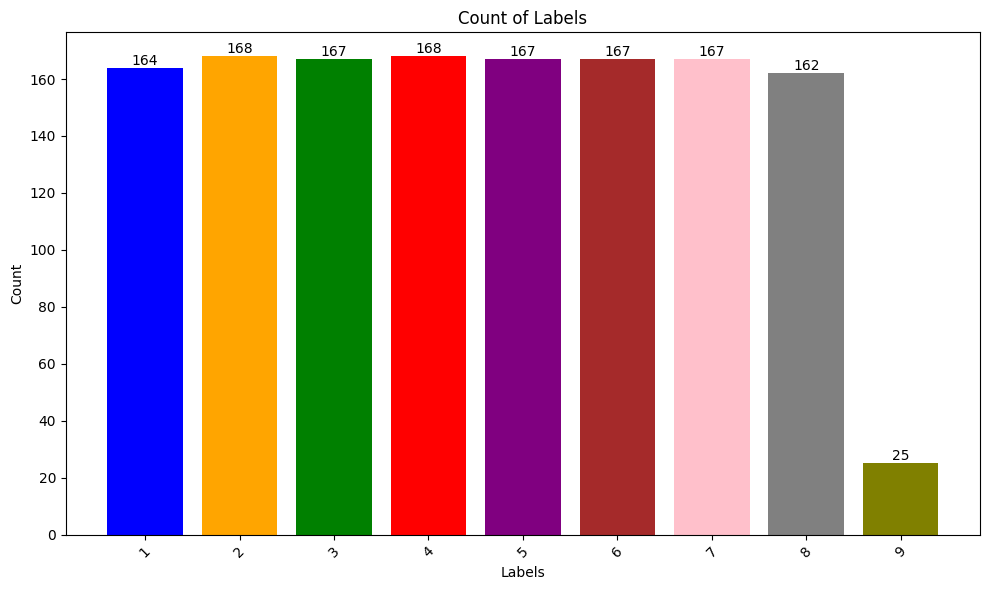

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
excel_file = 'drive/MyDrive/video_labels.xlsx'
data = pd.read_excel(excel_file)

# Extract the numeric part of the 'label' column to use for counting
data['NumericLabel'] = data['Label'].str.extract(r'a(\d+)')

# Get the counts of each label
label_counts = data['NumericLabel'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Assigning different colors to each label
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

# Plotting the bars
bars = plt.bar(label_counts.index, label_counts.values, color=colors)

# Adding counts as text on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
#check the framelength in frames per label

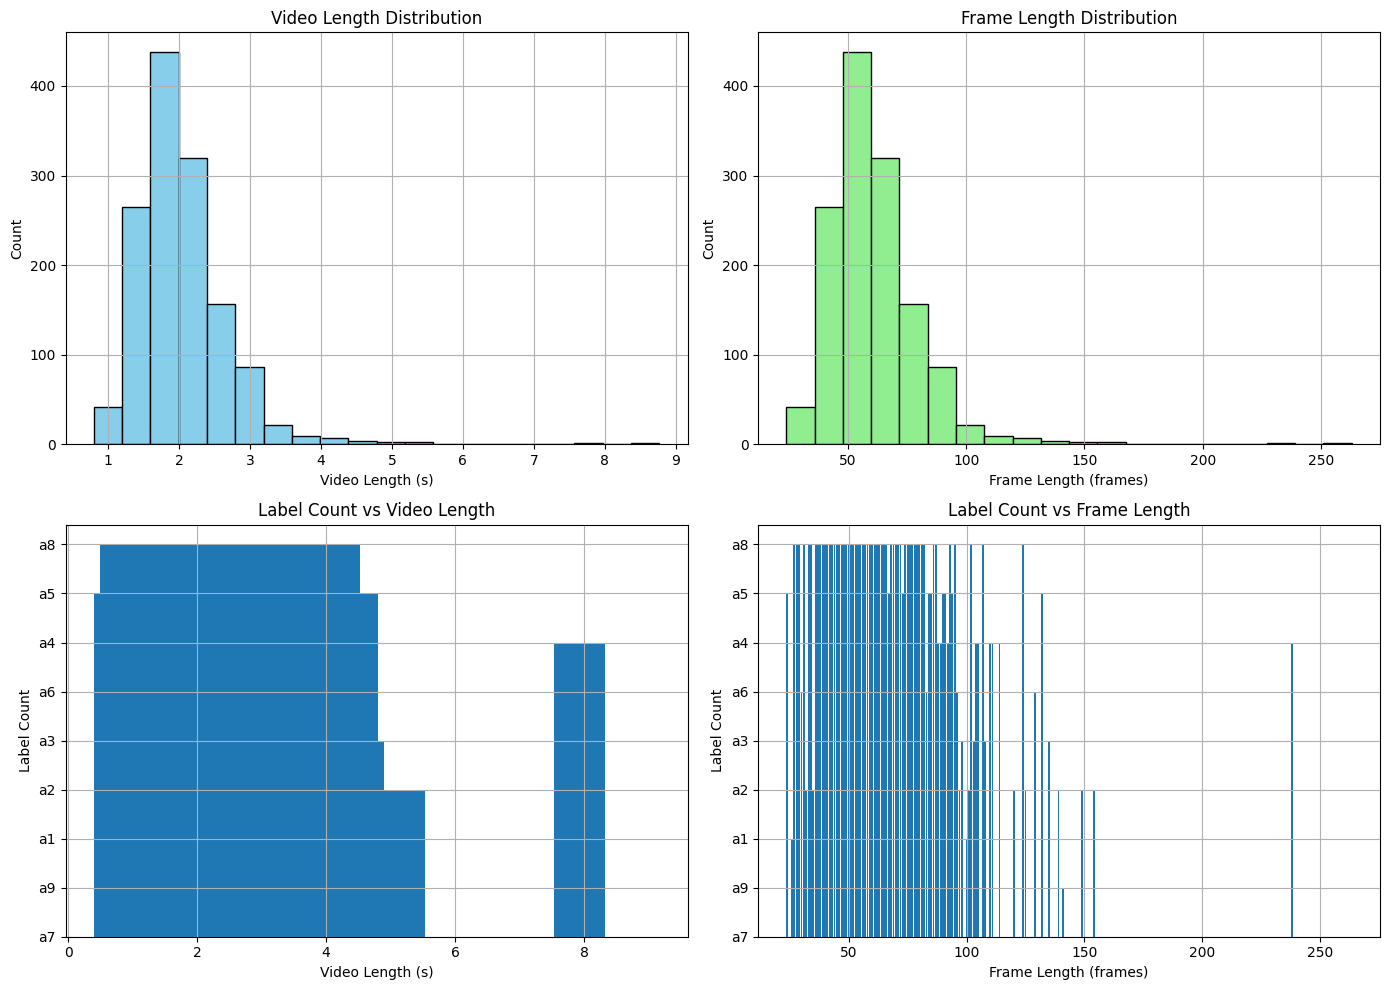

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_video_length_distribution(excel_file, frame_rate):
    """
    Plot the distribution of video lengths, frame lengths, and label counts from an Excel file.

    Args:
        excel_file (str): Path to the Excel file containing video length information.
        frame_rate (int): Frame rate of the videos.

    Returns:
        None
    """
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file)

    # Extract the 'Video Length (s)', 'Label', and any other relevant columns
    video_lengths = df['Duration (seconds)']
    labels = df['Label']
    # Assuming you have other columns in your Excel file for labels, adjust this accordingly

    # Calculate frame length in frames
    frame_length = video_lengths * frame_rate

    # Add 'Frame Length (frames)' column to the DataFrame
    df['Frame Length'] = frame_length

    # Create a histogram to visualize the distribution of video lengths, frame lengths, and label counts
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Plot video lengths in seconds
    axs[0, 0].hist(video_lengths, bins=20, color='skyblue', edgecolor='black')
    axs[0, 0].set_title('Video Length Distribution')
    axs[0, 0].set_xlabel('Video Length (s)')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].grid(True)

    # Plot frame lengths in frames
    axs[0, 1].hist(frame_length, bins=20, color='lightgreen', edgecolor='black')
    axs[0, 1].set_title('Frame Length Distribution')
    axs[0, 1].set_xlabel('Frame Length (frames)')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].grid(True)

    # Plot label counts over video lengths
    axs[1, 0].bar(video_lengths, labels)
    axs[1, 0].set_title('Label Count vs Video Length')
    axs[1, 0].set_xlabel('Video Length (s)')
    axs[1, 0].set_ylabel('Label Count')
    axs[1, 0].grid(True)

    # Plot label counts over frame lengths
    axs[1, 1].bar(frame_length, labels)
    axs[1, 1].set_title('Label Count vs Frame Length')
    axs[1, 1].set_xlabel('Frame Length (frames)')
    axs[1, 1].set_ylabel('Label Count')
    axs[1, 1].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Specify the Excel file containing video length information
excel_file = 'drive/MyDrive/video_labels.xlsx'

# Assume a frame rate of 30 frames per second (change this value accordingly)
frame_rate = 30

# Call the function with the file and frame rate
plot_video_length_distribution(excel_file, frame_rate)


In [ ]:
import pandas as pd

def print_mean_frame_length_per_label(excel_file):
    """
    Print the mean frame length per label from an Excel file.

    Args:
        excel_file (str): Path to the Excel file containing frame length and label information.

    Returns:
        None
    """
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file)

    # Group by 'Label' and calculate the mean frame length for each label
    label_frame_means = df.groupby('Label')['Frame Length'].mean()

    # Display the mean frame length for each label
    print("Mean Frame Length per Label:")
    print(label_frame_means)

# Example usage:
# Specify the Excel file containing frame length and label information
excel_file = 'drive/MyDrive/video_labels.xlsx'  # Replace with the actual file path

# Call the function to print the mean frame length per label
print_mean_frame_length_per_label(excel_file)


Mean Frame Length per Label:
Label
a1    52.810976
a2    61.172619
a3    65.820359
a4    60.196429
a5    57.712575
a6    60.862275
a7    65.778443
a8    56.518519
a9    84.000000
Name: Frame Length, dtype: float64


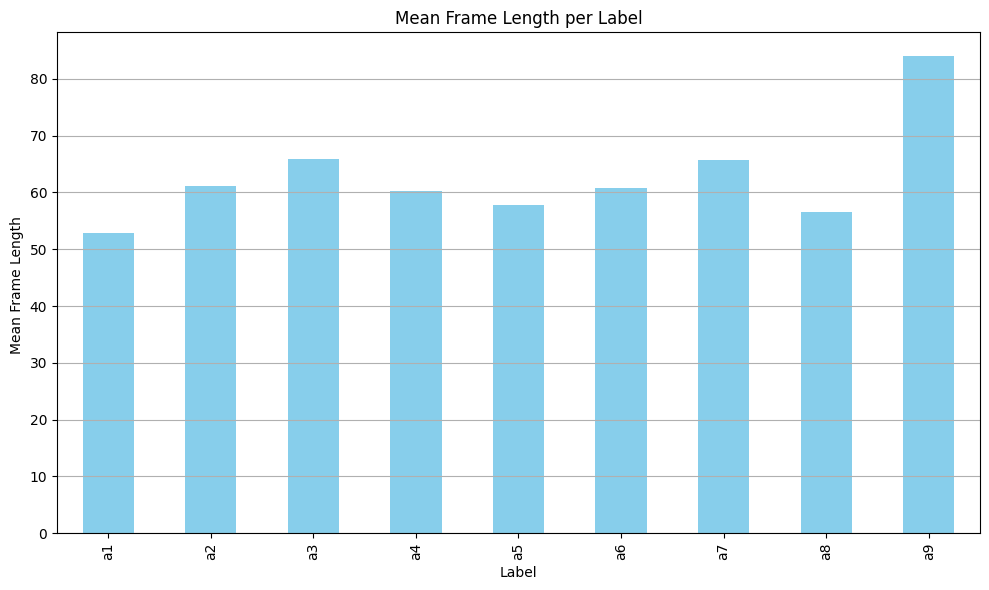

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_frame_length_per_label(excel_file):
    """
    Plot the mean frame length per label from an Excel file.

    Args:
        excel_file (str): Path to the Excel file containing frame length and label information.

    Returns:
        None
    """
    # Read the Excel file into a DataFrame
    df = pd.read_excel(excel_file)

    # Group by 'Label' and calculate the mean frame length for each label
    label_frame_means = df.groupby('Label')['Frame Length'].mean()

    # Plotting the mean frame length per label
    plt.figure(figsize=(10, 6))
    label_frame_means.plot(kind='bar', color='skyblue')
    plt.title('Mean Frame Length per Label')
    plt.xlabel('Label')
    plt.ylabel('Mean Frame Length ')
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Specify the Excel file containing frame length and label information
excel_file = 'drive/MyDrive/video_labels.xlsx'  # Replace with the actual file path

# Call the function to plot the mean frame length per label
plot_mean_frame_length_per_label(excel_file)


In [4]:
#mean frame length of the total set

import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = 'drive/MyDrive/video_labels.xlsx'

# Replace 'Column_Name' with the actual column name from your Excel file
column_name = 'Frame Length'

# Load the Excel file
data = pd.read_excel(file_path)

# Calculate the mean of the specified column
mean_value = data[column_name].mean()

print(f"The mean value of '{column_name}' column is: {mean_value}")


The mean value of 'Frame Length' column is: 60.580073800738006
